### Webscrape Stock Data

In [56]:
%run ../../../_config/base/base.ipynb

In [57]:
%run ../../../_util/core/core.ipynb

## Webscrape



====== WebDriver manager ======
Current google-chrome version is 107.0.5304
Get LATEST driver version for 107.0.5304
Driver [C:\Users\joshu\.wdm\drivers\chromedriver\win32\107.0.5304.62\chromedriver.exe] found in cache
C:\Users\joshu\AppData\Local\Temp\ipykernel_15412\3550841438.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


0     2022-11-01
1     2022-11-02
2     2022-11-03
3     2022-11-04
4     2022-11-07
5     2022-11-08
6     2022-11-09
7     2022-11-10
8     2022-11-11
9     2022-11-14
10    2022-11-15
11    2022-11-16
12    2022-11-17
13    2022-11-18
Name: Date, dtype: object
Headlines:
[<div aria-level="3" class="mCBkyc ynAwRc MBeuO nDgy9d" role="heading" style="-webkit-line-clamp:3">After Hours Most Active for Nov 1, 2022 : SHV, ENB, BFH ...</div>, <div aria-level="3" class="mCBkyc ynAwRc MBeuO nDgy9d" role="heading" style="-webkit-line-clamp:3">Spotify is going to war with Apple after the App Store rejected its big new 
feature</div>, <div aria-level="3" class="mCBkyc ynAwRc MBeuO nDgy9d" role="heading" style="-webkit-line-clamp:3">Dow closes 500 points lower, Nasdaq sheds 3% as Fed Chair Powell signals 
intent to continue hiking rates</div>, <div aria-level="3" class="mCBkyc ynAwRc MBeuO nDgy9d" role="heading" style="-webkit-line-clamp:3">Apple supplier Foxconn quadruples bonuses to staff hit b
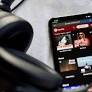
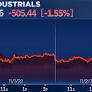
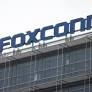
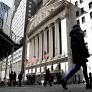
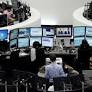
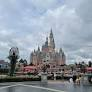
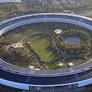
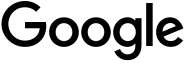
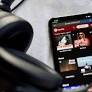
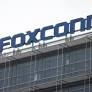
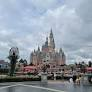

In [58]:
driver = webdriver.Chrome(ChromeDriverManager().install())
df_dict = {}
list_paths = []

for name in LIST_OF_TECH_STOCKS:
    counter = 0
    headline_data = []
    datetime_extract_data = []
    article_published_data = []
    publisher = []
    data = pd.read_csv("../../../Data/StockData/" + name)
    list_date = getDate(data)
    print(list_date)
    for dates in list_date:
        link = newsLink(name + " " + dates)
        driver.get(link)
        content = driver.page_source
        soup = BeautifulSoup(content)
        headlines = soup.find_all(class_="mCBkyc ynAwRc MBeuO nDgy9d")
        headlines_date = soup.find_all(class_="OSrXXb ZE0LJd YsWzw")
        headlines_publisher = soup.find_all(class_="QyR1Ze ZGomKf")
        print("Headlines:")
        print(headlines)
        for val in headlines:
            headlineDate = headlines_date[counter].get_text().strip()
            headlinePublisher = headlines_publisher[counter].get_text().strip()
            print(headlines_publisher[counter])
            strVal = val.get_text().strip()
            headline_data.append(strVal)
            datetime_extract_data.append(dates) # change currtime
            article_published_data.append(headlineDate)
            publisher.append(headlinePublisher)
            counter += 1
        
            print(len(headlineDate))
            print(len(datetime_extract_data))
            print(len(article_published_data))
        d = {'Date': datetime_extract_data, 
            'Headline Data': headline_data,
            'Article Published Date': article_published_data,
            'Article Publisher': publisher
            }
        df_extract = pd.DataFrame(d)
        df_extract.head()
        print(soup)
        df_dict[val] = df_extract
        list_paths.append(MNT_NEWSDATA + name)
        print(df_extract.head())
        break
    break

In [59]:
print(df_extract.head())

         Date                                      Headline Data  \
0  2022-11-01  After Hours Most Active for Nov 1, 2022 : SHV,...   
1  2022-11-01  Spotify is going to war with Apple after the A...   
2  2022-11-01  Dow closes 500 points lower, Nasdaq sheds 3% a...   
3  2022-11-01  Apple supplier Foxconn quadruples bonuses to s...   
4  2022-11-01  After Hours Most Active for Oct 28, 2022 : SHV...   

  Article Published Date Article Publisher  
0            3 weeks ago                    
1            3 weeks ago                    
2            2 weeks ago                    
3            3 weeks ago                    
4            3 weeks ago                    


### Move Data to Data Folder

In [60]:
idx = 0
for val in df_dict:
    data = df_dict[val]
    writeCSV(data, list_paths[idx])
    idx += 1